<center><h1>Chawan_Sneha_HW4</h1></center>
<br>
<br>

Name: SNEHA CHAWAN
<br>
Github Username: sneha-chawan
<br>
USC ID: 8611548513

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
import pandas as pd 
import numpy as np
import glob
import os
from scipy.stats import bootstrap
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

Get the AReM Data Set

In [2]:
#bending1 folder 
folder_path = r'../Data/AReM/bending1'
os.chdir(folder_path)
dfs = []

for root, dirs, files in os.walk("."):
    for name in files:
        if name.endswith(".csv"):
            df_temp = pd.read_csv(name, skiprows=4)
            dfs.append((name, df_temp))

first_two_dfs = [df for _, df in dfs[:2]]

if len(first_two_dfs) == 2:
    merged_df = pd.concat(first_two_dfs, ignore_index=True)

remaining_dfs = [df for _, df in dfs[2:]]
if remaining_dfs:
    rest_df = pd.concat(remaining_dfs, ignore_index=True)
else:
    rest_df = pd.DataFrame()
os.chdir(r'..')

In [3]:
os.getcwd()

'C:\\Users\\Dell\\JUPYTER_FILES\\DSCI 552\\Homework 4\\Data\\AReM'

In [4]:
#bending2 folder

relative_folder_path ='../AReM/bending2'
folder_path = os.path.abspath(relative_folder_path)
os.chdir(folder_path )

dfs_bending2= []

for root, dirs, files in os.walk("."):
    for name in files:
        if name.endswith(".csv"):
            df_temp_bending2= pd.read_csv(name, skiprows=4)
            dfs_bending2.append((name, df_temp_bending2))

first_two_dfs_bending2= [df for _, df in dfs_bending2[:2]]

if len(first_two_dfs_bending2) == 2:
    merged_df_bending2 = pd.concat(first_two_dfs_bending2, ignore_index=True)

remaining_dfs_bending2= [df for _, df in dfs_bending2[2:]]

if remaining_dfs_bending2:
    rest_df_bending2= pd.concat(remaining_dfs_bending2, ignore_index=True)
else:
    rest_df_bending2= pd.DataFrame()
os.chdir(r'..')

In [5]:
os.getcwd()

'C:\\Users\\Dell\\JUPYTER_FILES\\DSCI 552\\Homework 4\\Data\\AReM'

In [6]:
#lying folder

relative_folder_path ='../AReM/lying'
folder_path = os.path.abspath(relative_folder_path)
os.chdir(folder_path )

dfs_lying_test= []
dfs_lying_train= []

files_to_merge_test= ["dataset1.csv", "dataset2.csv", "dataset3.csv"]  
files_to_merge_train = ["dataset4.csv", "dataset5.csv", "dataset6.csv","dataset7.csv","dataset8.csv","dataset9.csv","dataset10.csv","dataset11.csv","dataset12.csv","dataset13.csv","dataset14.csv","dataset15.csv"]  
for name in files_to_merge_test:
    if name.endswith(".csv"):
        df_temp_lying_1= pd.read_csv(name, skiprows=4)
        dfs_lying_test.append( df_temp_lying_1)

for name in files_to_merge_train:
    if name.endswith(".csv"):
        df_temp_lying_2= pd.read_csv(name, skiprows=4)
        dfs_lying_train.append(df_temp_lying_2)

os.chdir(r'..')

In [7]:
#cycling folder

relative_folder_path ='../AReM/cycling'
folder_path = os.path.abspath(relative_folder_path)
os.chdir(folder_path )
dfs_cycling_test= []
dfs_cycling_train= []

files_to_merge_test= ["dataset1.csv", "dataset2.csv", "dataset3.csv"]  
files_to_merge_train = ["dataset4.csv", "dataset5.csv", "dataset6.csv","dataset7.csv","dataset8.csv","dataset9.csv","dataset10.csv","dataset11.csv","dataset12.csv","dataset13.csv","dataset14.csv","dataset15.csv"]  
for name in files_to_merge_test:
    if name.endswith(".csv"):
        df_temp_cycling_1= pd.read_csv(name, skiprows=4)
        dfs_cycling_test.append(df_temp_cycling_1)


for name in files_to_merge_train:
    if name.endswith(".csv"):
        df_temp_cycling_2= pd.read_csv(name, skiprows=4, error_bad_lines=False)
        dfs_cycling_train.append(df_temp_cycling_2)

os.chdir(r'..')

In [8]:
#sitting folder

relative_folder_path ='../AReM/sitting'
folder_path = os.path.abspath(relative_folder_path)
os.chdir(folder_path )
dfs_sitting_test= []
dfs_sitting_train= []

files_to_merge_test= ["dataset1.csv", "dataset2.csv", "dataset3.csv"]  
files_to_merge_train = ["dataset4.csv", "dataset5.csv", "dataset6.csv","dataset7.csv","dataset8.csv","dataset9.csv","dataset10.csv","dataset11.csv","dataset12.csv","dataset13.csv","dataset14.csv","dataset15.csv"]  
for name in files_to_merge_test:
    if name.endswith(".csv"):
        df_temp_sitting_1= pd.read_csv(name, skiprows=4)
        dfs_sitting_test.append(df_temp_sitting_1)


for name in files_to_merge_train:
    if name.endswith(".csv"):
        df_temp_sitting_2= pd.read_csv(name, skiprows=4)
        dfs_sitting_train.append(df_temp_sitting_2)


os.chdir(r'..')

In [9]:
#standing folder

relative_folder_path ='../AReM/standing'
folder_path = os.path.abspath(relative_folder_path)
os.chdir(folder_path )
dfs_standing_test= []
dfs_standing_train= []

files_to_merge_test= ["dataset1.csv", "dataset2.csv", "dataset3.csv"]  
files_to_merge_train = ["dataset4.csv", "dataset5.csv", "dataset6.csv","dataset7.csv","dataset8.csv","dataset9.csv","dataset10.csv","dataset11.csv","dataset12.csv","dataset13.csv","dataset14.csv","dataset15.csv"]  
for name in files_to_merge_test:
    if name.endswith(".csv"):
        df_temp_standing_1= pd.read_csv(name, skiprows=4)
        dfs_standing_test.append(df_temp_standing_1)


for name in files_to_merge_train:
    if name.endswith(".csv"):
        df_temp_standing_2= pd.read_csv(name, skiprows=4)
        dfs_standing_train.append( df_temp_standing_2)

os.chdir(r'..')

In [10]:
#walking folder

relative_folder_path ='../AReM/walking'
folder_path = os.path.abspath(relative_folder_path)
os.chdir(folder_path )
dfs_walking_test= []
dfs_walking_train= []

files_to_merge_test= ["dataset1.csv", "dataset2.csv", "dataset3.csv"]  
files_to_merge_train = ["dataset4.csv", "dataset5.csv", "dataset6.csv","dataset7.csv","dataset8.csv","dataset9.csv","dataset10.csv","dataset11.csv","dataset12.csv","dataset13.csv","dataset14.csv","dataset15.csv"]  
for name in files_to_merge_test:
    if name.endswith(".csv"):
        df_temp_walking_1= pd.read_csv(name, skiprows=4)
        dfs_walking_test.append(df_temp_walking_1)


for name in files_to_merge_train:
    if name.endswith(".csv"):
        df_temp_walking_2= pd.read_csv(name, skiprows=4)
        dfs_walking_train.append( df_temp_walking_2)


os.chdir(r'..')

### b) Splitting Data

In [11]:
train_list = remaining_dfs + remaining_dfs_bending2 + dfs_cycling_train+dfs_lying_train+dfs_sitting_train+dfs_standing_train +dfs_walking_train
print(train_list)

[     # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      42.50       0.50      20.00       0.82      36.00   
476           119000      42.67       0.47      21.00       0.00      36.33   
477           119250      44.33       0.94      21.00       0.00      36.33   
478           119500      45.25       0.43      26.75       1.79      36.00   
479           119750      47.25       0.83      29.75       0.43      35.25   

     var_rss23  
0         0.00  
1         1.09  

In [12]:
len(train_list)

69

In [13]:
test_list=first_two_dfs+first_two_dfs_bending2+dfs_cycling_test+dfs_lying_test+dfs_sitting_test+dfs_standing_test +dfs_walking_test
test_list

[     # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
 0                  0      39.25       0.43      22.75       0.43      33.75   
 1                250      39.25       0.43      23.00       0.00      33.00   
 2                500      39.25       0.43      23.25       0.43      33.00   
 3                750      39.50       0.50      23.00       0.71      33.00   
 4               1000      39.50       0.50      24.00       0.00      33.00   
 ..               ...        ...        ...        ...        ...        ...   
 475           118750      43.33       0.47      25.00       0.00      30.00   
 476           119000      43.50       0.50      25.50       0.50      30.00   
 477           119250      43.50       0.50      24.75       0.43      30.00   
 478           119500      43.50       0.50      24.33       0.47      30.00   
 479           119750      43.50       0.50      24.25       0.43      30.00   
 
      var_rss23  
 0          1.3  
 1

### (c) Feature Extraction

### i. Research

#### The time-domain features which are used in time series classification are namely Minimum, maximum, mean, median, standard deviation, first quartile, and third quartile.
The min is the minimum value of all data points
The max is the maximum value of all data points
The mean is the arithmetic average of all data points in the time series. It represents the central location of the data.
The median is the middle value in the sorted time series. It is less affected by extreme outliers compared to the mean
The standard deviation measures the dispersion or spread of data points around the mean
The 1st quartile, denoted as Q1, represents the value below which 25% of the data points in a dataset fall
The 3rd quartile, denoted as Q3, represents the value below which 75% of the data points in a dataset fall¶

### ii. Extraction

In [14]:
coloums=[]
for k in range(1,7):
    coloums.append(['min'+str(k),'max'+str(k),r'mean'+str(k),r'median'+str(k),r'std'+str(k),r'1st quart'+str(k),r'3rd quart'+str(k)])
final_colmn = [item for sublist in coloums for item in sublist]
    

In [15]:
bending1=[]
for k in range(1,8):
    bending1.append("dataset"+str(k))

filepath_bend= r'../AReM/bending1'

dataframe_bending1= pd.DataFrame(columns=[final_colmn])
for no in bending1:
    df=pd.read_csv(filepath_bend+'/' + str(no)+".csv",skiprows=4)
    df.drop(columns=['# Columns: time'],axis=1)
    list_bending1=[]
    for no2 in df.columns[1:]:
        list_bending1.append(df[no2].min())
        list_bending1.append(df[no2].max())
        list_bending1.append(df[no2].mean())
        list_bending1.append(df[no2].median())
        list_bending1.append(df[no2].std())
        list_bending1.append(df[no2].quantile(0.25))
        list_bending1.append(df[no2].quantile(0.75))
        
    dataframe_bending1.loc[len(dataframe_bending1)]=list_bending1

In [16]:
bending2=[]
for k in range(1,7):
    bending2.append("dataset"+str(k))

filepath_bend2= r'../AReM/bending2'

dataframe_bending2= pd.DataFrame(columns=[final_colmn])

for file in bending2:
    list_bending2=[]
    if file == 'dataset4':
        path="../AReM/bending2/"+str(file)+".csv"
        df_bend2=pd.read_csv(path,sep=' ',skiprows=5,names=["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"],index_col=False)  
        for j in df_bend2.columns[1:]:
            list_bending2.append(df_bend2[j].min())
            list_bending2.append(df_bend2[j].max())
            list_bending2.append(df_bend2[j].mean())
            list_bending2.append(df_bend2[j].median())
            list_bending2.append(df_bend2[j].std())
            list_bending2.append(df_bend2[j].quantile(0.25))
            list_bending2.append(df_bend2[j].quantile(0.75))
    else:
        df_bend2=pd.read_csv(filepath_bend2+'/' + str(file)+".csv",skiprows=4)
        for j in df_bend2.columns[1:]:
            list_bending2.append(df_bend2[j].min())
            list_bending2.append(df_bend2[j].max())
            list_bending2.append(df_bend2[j].mean())
            list_bending2.append(df_bend2[j].median())
            list_bending2.append(df_bend2[j].std())
            list_bending2.append(df_bend2[j].quantile(0.25))
            list_bending2.append(df_bend2[j].quantile(0.75))
    dataframe_bending2.loc[len(dataframe_bending2)]=list_bending2

In [17]:
cycling=[]
for k in range(1,16):
    cycling.append("dataset"+str(k))
filepath_cyc= r'../AReM/cycling'

dataframe_cycling= pd.DataFrame(columns=[final_colmn])
for i in cycling:
    df_cyc=pd.read_csv(filepath_cyc+'/' + str(i)+".csv",skiprows=4)
    list_cycling=[]
    for j in df_cyc.columns[1:]:
        list_cycling.append(df_cyc[j].min())
        list_cycling.append(df_cyc[j].max())
        list_cycling.append(df_cyc[j].mean())
        list_cycling.append(df_cyc[j].median())
        list_cycling.append(df_cyc[j].std())
        list_cycling.append(df_cyc[j].quantile(0.25))
        list_cycling.append(df_cyc[j].quantile(0.75))
        
    dataframe_cycling.loc[len(dataframe_cycling)]=list_cycling

In [18]:
lying=[]
for k in range(1,16):
    lying.append("dataset"+str(k))
filepath_ly= r'../AReM/lying'

dataframe_lying= pd.DataFrame(columns=[final_colmn])
for i in cycling:
    df_ly=pd.read_csv(filepath_ly+'/' + str(i)+".csv",skiprows=4)
    list_lying=[]
    for j in df_ly.columns[1:]:
        list_lying.append(df_ly[j].min())
        list_lying.append(df_ly[j].max())
        list_lying.append(df_ly[j].mean())
        list_lying.append(df_ly[j].median())
        list_lying.append(df_ly[j].std())
        list_lying.append(df_ly[j].quantile(0.25))
        list_lying.append(df_ly[j].quantile(0.75))
        
    dataframe_lying.loc[len(dataframe_lying)]=list_lying

In [19]:
sitting=[]
for k in range(1,16):
    sitting.append("dataset"+str(k))
filepath_sit= r'../AReM/sitting'

dataframe_sitting= pd.DataFrame(columns=[final_colmn])
for i in sitting:
    df_sit=pd.read_csv(filepath_sit+'/' + str(i)+".csv",skiprows=4)
    list_sitting=[]
    for j in df_sit.columns[1:]:
        list_sitting.append(df_sit[j].min())
        list_sitting.append(df_sit[j].max())
        list_sitting.append(df_sit[j].mean())
        list_sitting.append(df_sit[j].median())
        list_sitting.append(df_sit[j].std())
        list_sitting.append(df_sit[j].quantile(0.25))
        list_sitting.append(df_sit[j].quantile(0.75))
        
    dataframe_sitting.loc[len(dataframe_sitting)]=list_sitting

In [20]:
standing=[]
for k in range(1,16):
    standing.append("dataset"+str(k))
filepath_stan= r'../AReM/standing'

dataframe_standing= pd.DataFrame(columns=[final_colmn])
for i in standing:
    df_stan=pd.read_csv(filepath_stan+'/' + str(i)+".csv",skiprows=4)
    list_standing=[]
    for j in df_stan.columns[1:]:
        list_standing.append(df_stan[j].min())
        list_standing.append(df_stan[j].max())
        list_standing.append(df_stan[j].mean())
        list_standing.append(df_stan[j].median())
        list_standing.append(df_stan[j].std())
        list_standing.append(df_stan[j].quantile(0.25))
        list_standing.append(df_stan[j].quantile(0.75))
        
    dataframe_standing.loc[len(dataframe_standing)]=list_standing

In [21]:
walking=[]
for k in range(1,16):
    walking.append("dataset"+str(k))
filepath_walk= r'../AReM/walking'

dataframe_walking= pd.DataFrame(columns=[final_colmn])
for i in walking:
    df_walk=pd.read_csv(filepath_walk+'/' + str(i)+".csv",skiprows=4)
    list_walking=[]
    for j in df_walk.columns[1:]:
        list_walking.append(df_walk[j].min())
        list_walking.append(df_walk[j].max())
        list_walking.append(df_walk[j].mean())
        list_walking.append(df_walk[j].median())
        list_walking.append(df_walk[j].std())
        list_walking.append(df_walk[j].quantile(0.25))
        list_walking.append(df_walk[j].quantile(0.75))
        
    dataframe_walking.loc[len(dataframe_walking)]=list_walking

In [22]:
frames=[dataframe_bending1,dataframe_bending2,dataframe_cycling,dataframe_lying,dataframe_sitting,dataframe_standing,dataframe_walking]
final_dataframe= pd.concat(frames,ignore_index=True)
final_dataframe.index.name='Instance'
final_dataframe.index+=1
final_dataframe

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
Instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400
4,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000
5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,3.283983,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
85,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,3.119856,13.5000,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650
86,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,2.823124,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350


### iii. Standard Deviation

In [23]:
final_dataframe.describe().loc["std"]

min1          9.569975
max1          4.394362
mean1         5.335718
median1       5.440054
std1          1.772153
1st quart1    6.153590
3rd quart1    5.138925
min2          0.000000
max2          5.062729
mean2         1.574164
median2       1.412244
std2          0.884105
1st quart2    0.946386
3rd quart2    2.125266
min3          2.956462
max3          4.875137
mean3         4.008380
median3       4.036396
std3          0.946710
1st quart3    4.220658
3rd quart3    4.171628
min4          0.000000
max4          2.183625
mean4         1.166114
median4       1.145586
std4          0.458242
1st quart4    0.843620
3rd quart4    1.552504
min5          6.124001
max5          5.741238
mean5         5.675593
median5       5.813782
std5          1.024898
1st quart5    6.096465
3rd quart5    5.531720
min6          0.045838
max6          2.518921
mean6         1.154812
median6       1.086474
std6          0.517617
1st quart6    0.758584
3rd quart6    1.523599
Name: std, dtype: float64

In [24]:
confidence_intervals_df = pd.DataFrame(columns=["Feature", "90% Confidence Interval"])
confidence_intervals = []
confidence_intervals_df["Feature"] = final_colmn

for i in range(len(final_dataframe.columns)):
    feature_data = final_dataframe.iloc[:, i]
    res = bootstrap((feature_data,), np.std, confidence_level=0.9,random_state=20, method='percentile')
    confidence_intervals.append(res.confidence_interval)

confidence_intervals_df["90% Confidence Interval"] = pd.Series(confidence_intervals)
confidence_intervals_df

,Feature,90% Confidence Interval
0,min1,"(8.220271812862707, 10.747142221480257)"
1,max1,"(3.3020854247746216, 5.270227562748143)"
2,mean1,"(4.677505279146083, 5.86474583189203)"
3,median1,"(4.761192369125907, 5.964650126105345)"
4,std1,"(1.5629222078435212, 1.9375555695142603)"
5,1st quart1,"(5.5449812421193245, 6.604263735725837)"
6,3rd quart1,"(4.306865597067371, 5.821317331332637)"
7,min2,"(0.0, 0.0)"
8,max2,"(4.605728089602471, 5.3749804527194955)"
9,mean2,"(1.393513574368543, 1.6959646539027875)"


### iv. Select Features

#### According to me the most important features are Mean , median and Standard Deviation.
Standard Deviation because a) its a key features in determining the expansion of the curve and how it's shaped along the values of features. b) In our dataset, the range of confidence interval is the lowest for standard deviation and hence its an important feature.
Median because a) its range of confidence interval is also among the smallest b) median gives how skewed the distribution is and represents the half of dataset and therefore gives a better perspective of the data.
Mean because a)it gives the information about the position of peak of the distribution and the type of distribution b) In our dataset its range for confidence interval is among the smallest ones.

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [25]:
final_dataframe.shape

(88, 42)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the training and testing splits
fnl_train1 = final_dataframe.iloc[2:7]
fnl_test1 = final_dataframe.iloc[0:2]
fnl_train2 = final_dataframe.iloc[9:13]
fnl_test2 = final_dataframe.iloc[7:9]
fnl_train3 = final_dataframe.iloc[16:28]
fnl_test3 = final_dataframe.iloc[13:16]
fnl_train4 = final_dataframe.iloc[31:43]
fnl_test4 = final_dataframe.iloc[28:31]
fnl_train5 = final_dataframe.iloc[46:58]
fnl_test5 = final_dataframe.iloc[43:46]
fnl_train6 = final_dataframe.iloc[61:73]
fnl_test6 = final_dataframe.iloc[58:61]
fnl_train7 = final_dataframe.iloc[76:89]
fnl_test7 = final_dataframe.iloc[73:76]


fnl_tra=[fnl_train1,fnl_train2,fnl_train3,fnl_train4,fnl_train5,fnl_train6,fnl_train7]
fnl_tes=[fnl_test1,fnl_test2,fnl_test3,fnl_test4,fnl_test5,fnl_test6,fnl_test7]

fnl_train=pd.concat(fnl_tra)
fnl_test=pd.concat(fnl_tes)



In [27]:
fnl_train

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
Instance,,,,,,,,,,,,,,,,,,,,,
3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400
4,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000
5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000
6,37.00,48.00,43.454958,43.25,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.00,0.00,5.26,0.679646,0.50,0.622534,0.4300,0.8700
7,36.25,48.00,43.969125,44.50,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.75,0.00,2.96,0.555312,0.49,0.487826,0.0000,0.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,3.283983,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
85,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,3.119856,13.5000,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650
86,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,2.823124,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350


In [28]:
fnl_selected_df=fnl_train[['mean1','median1','std1','mean2','median2','std2','mean6','median6','std6']]
print(fnl_selected_df.shape)

(69, 9)


In [29]:
labelfff = np.array([1]*9 + [0]*60)
labelfff.shape

(69,)

In [30]:
fnl_selected_df.reset_index(drop=True,inplace=True)

In [31]:
fnl_selected_df['labels']=labelfff

In [32]:
selected_columns = ['mean1', 'median1', 'std1', 'mean2', 'median2', 'std2', 'mean6', 'median6', 'std6','labels']
data = fnl_selected_df[selected_columns].values
new_df = pd.DataFrame(data, columns=selected_columns)

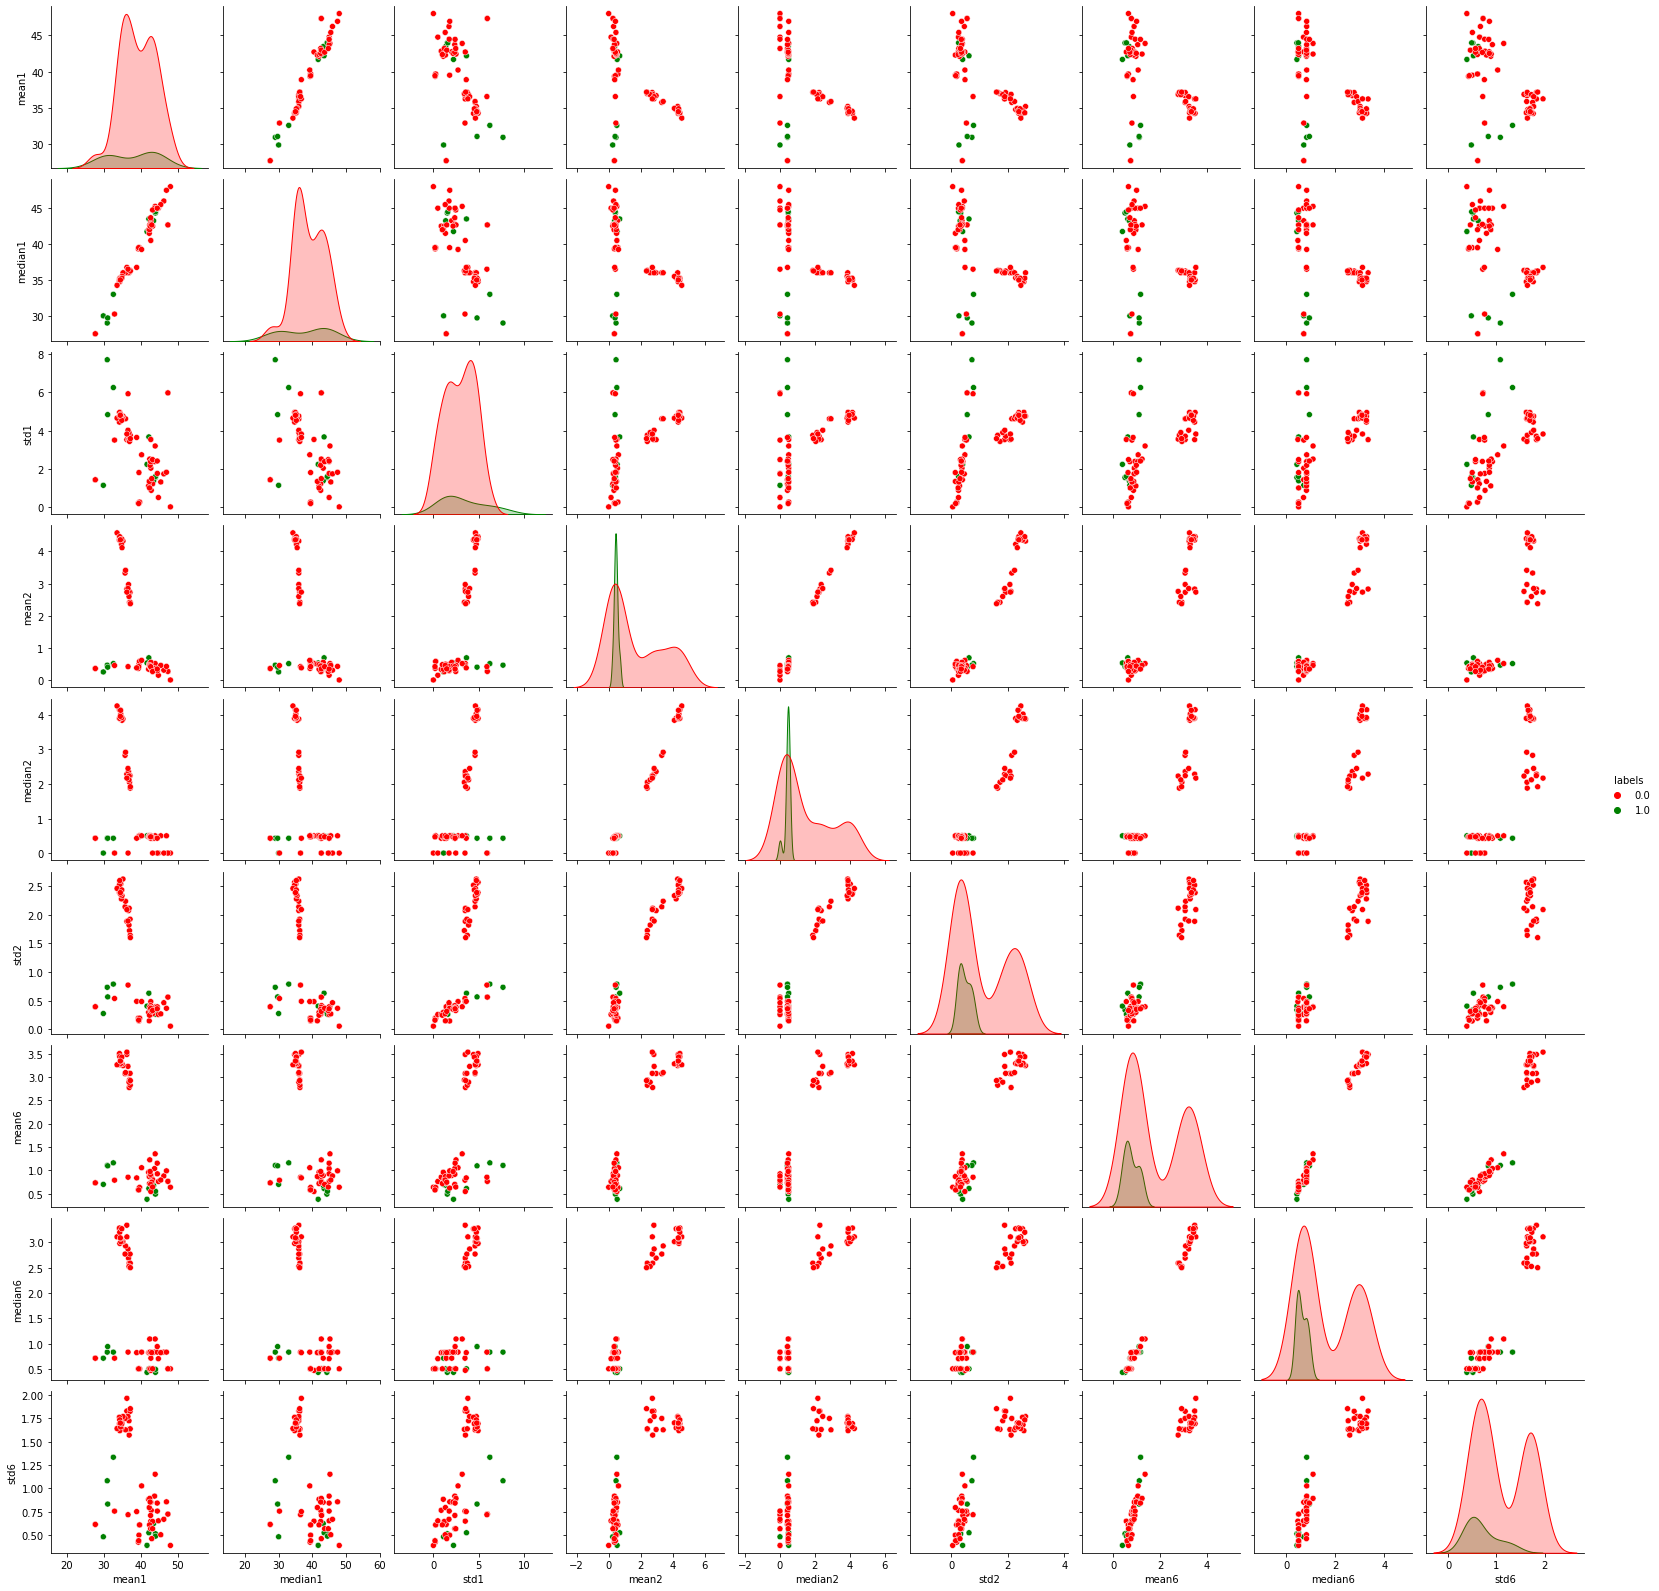

In [33]:
sns.pairplot(new_df, hue ='labels',palette=['r','g'])

#### ii. Splitted Plots

In [34]:
def main_df(p):
    fnl_col = []
    stat = ['Mean','Median','std']

    for i in [1,2,6]:
        for j in stat:
            for k in range(1,p+1):
                fnl_col.append(j+str(i)+str(k))
    df_fnl= pd.DataFrame(columns=fnl_col)
    l1=[]
    l2=[]
    l3=[]
    lst_fnl=[]
    for v in train_list:
        for j in [1,2,6]:
            d=np.array_split(v, p)
            for i in d:
                k=i.iloc[:,j]
                l1.append(k.mean())            
            for i in d:
                k=i.iloc[:,j]          
                l2.append(k.median())
            for i in d:
                k=i.iloc[:,j]          
                l3.append(k.std())
            lst_fnl.append(l1)
            l1=[]
            lst_fnl.append(l2)
            l2=[]
            lst_fnl.append(l3)
            l3=[]
        
    flat=[]
    for i in lst_fnl:
        flat+=i
    j=0
    for i in fnl_col:
        df_fnl[i] = flat[j:len(flat)+1:9*p]
        j+=1
    labelss= list([1]*9 + [0]*60)
    df_fnl['labels']=labelss
    return df_fnl

df_final=main_df(2)


labelss= list([1]*9 + [0]*60)
df_final['labels']=labelss
df_final

,Mean11,Mean12,Median11,Median12,std11,std12,Mean21,Mean22,Median21,Median22,std21,std22,Mean61,Mean62,Median61,Median62,std61,std62,labels
0,44.057167,43.851833,44.500,43.500,1.556971,1.557168,0.381042,0.471458,0.470,0.500,0.329540,0.342346,0.598250,0.388333,0.500,0.000,0.526656,0.478528,1
1,43.278875,41.080750,45.000,42.000,3.473355,3.537481,0.673292,0.718792,0.485,0.500,0.634285,0.627915,0.640958,0.586083,0.765,0.470,0.554542,0.491873,1
2,41.621208,41.734917,42.330,41.500,3.118644,0.595920,0.623083,0.448875,0.500,0.500,0.489595,0.273050,0.419083,0.347500,0.430,0.430,0.411200,0.363144,1
3,44.117042,42.792875,45.000,42.670,1.359836,1.058792,0.250042,0.506125,0.000,0.500,0.314099,0.260761,0.815417,0.543875,0.710,0.500,0.718016,0.473445,1
4,43.486208,44.452042,43.710,44.500,1.281976,1.771251,0.378667,0.447583,0.470,0.500,0.284434,0.235493,0.524875,0.585750,0.470,0.500,0.486847,0.487918,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,33.334500,33.839250,34.000,34.500,4.874433,4.411903,4.408083,4.745042,4.195,4.320,2.196206,2.694219,3.229167,3.290292,3.110,3.155,1.637310,1.646023,0
65,34.036750,34.608750,34.415,35.500,4.872880,4.621400,4.778292,4.134375,4.030,3.740,2.762730,2.387460,3.543708,3.321417,3.255,3.155,1.703098,1.758379,0
66,34.033875,35.058583,35.000,35.875,4.758757,4.880650,4.574625,4.169292,4.470,3.880,2.391804,2.315929,3.244042,3.432208,2.980,3.255,1.619767,1.691050,0
67,34.920792,34.825667,35.330,35.250,4.272282,4.785599,4.177958,4.583208,3.865,4.070,2.341763,2.514203,3.430625,3.418667,3.270,3.350,1.781928,1.598536,0


In [35]:
df_final.columns

Index(['Mean11', 'Mean12', 'Median11', 'Median12', 'std11', 'std12', 'Mean21',
       'Mean22', 'Median21', 'Median22', 'std21', 'std22', 'Mean61', 'Mean62',
       'Median61', 'Median62', 'std61', 'std62', 'labels'],
      dtype='object')

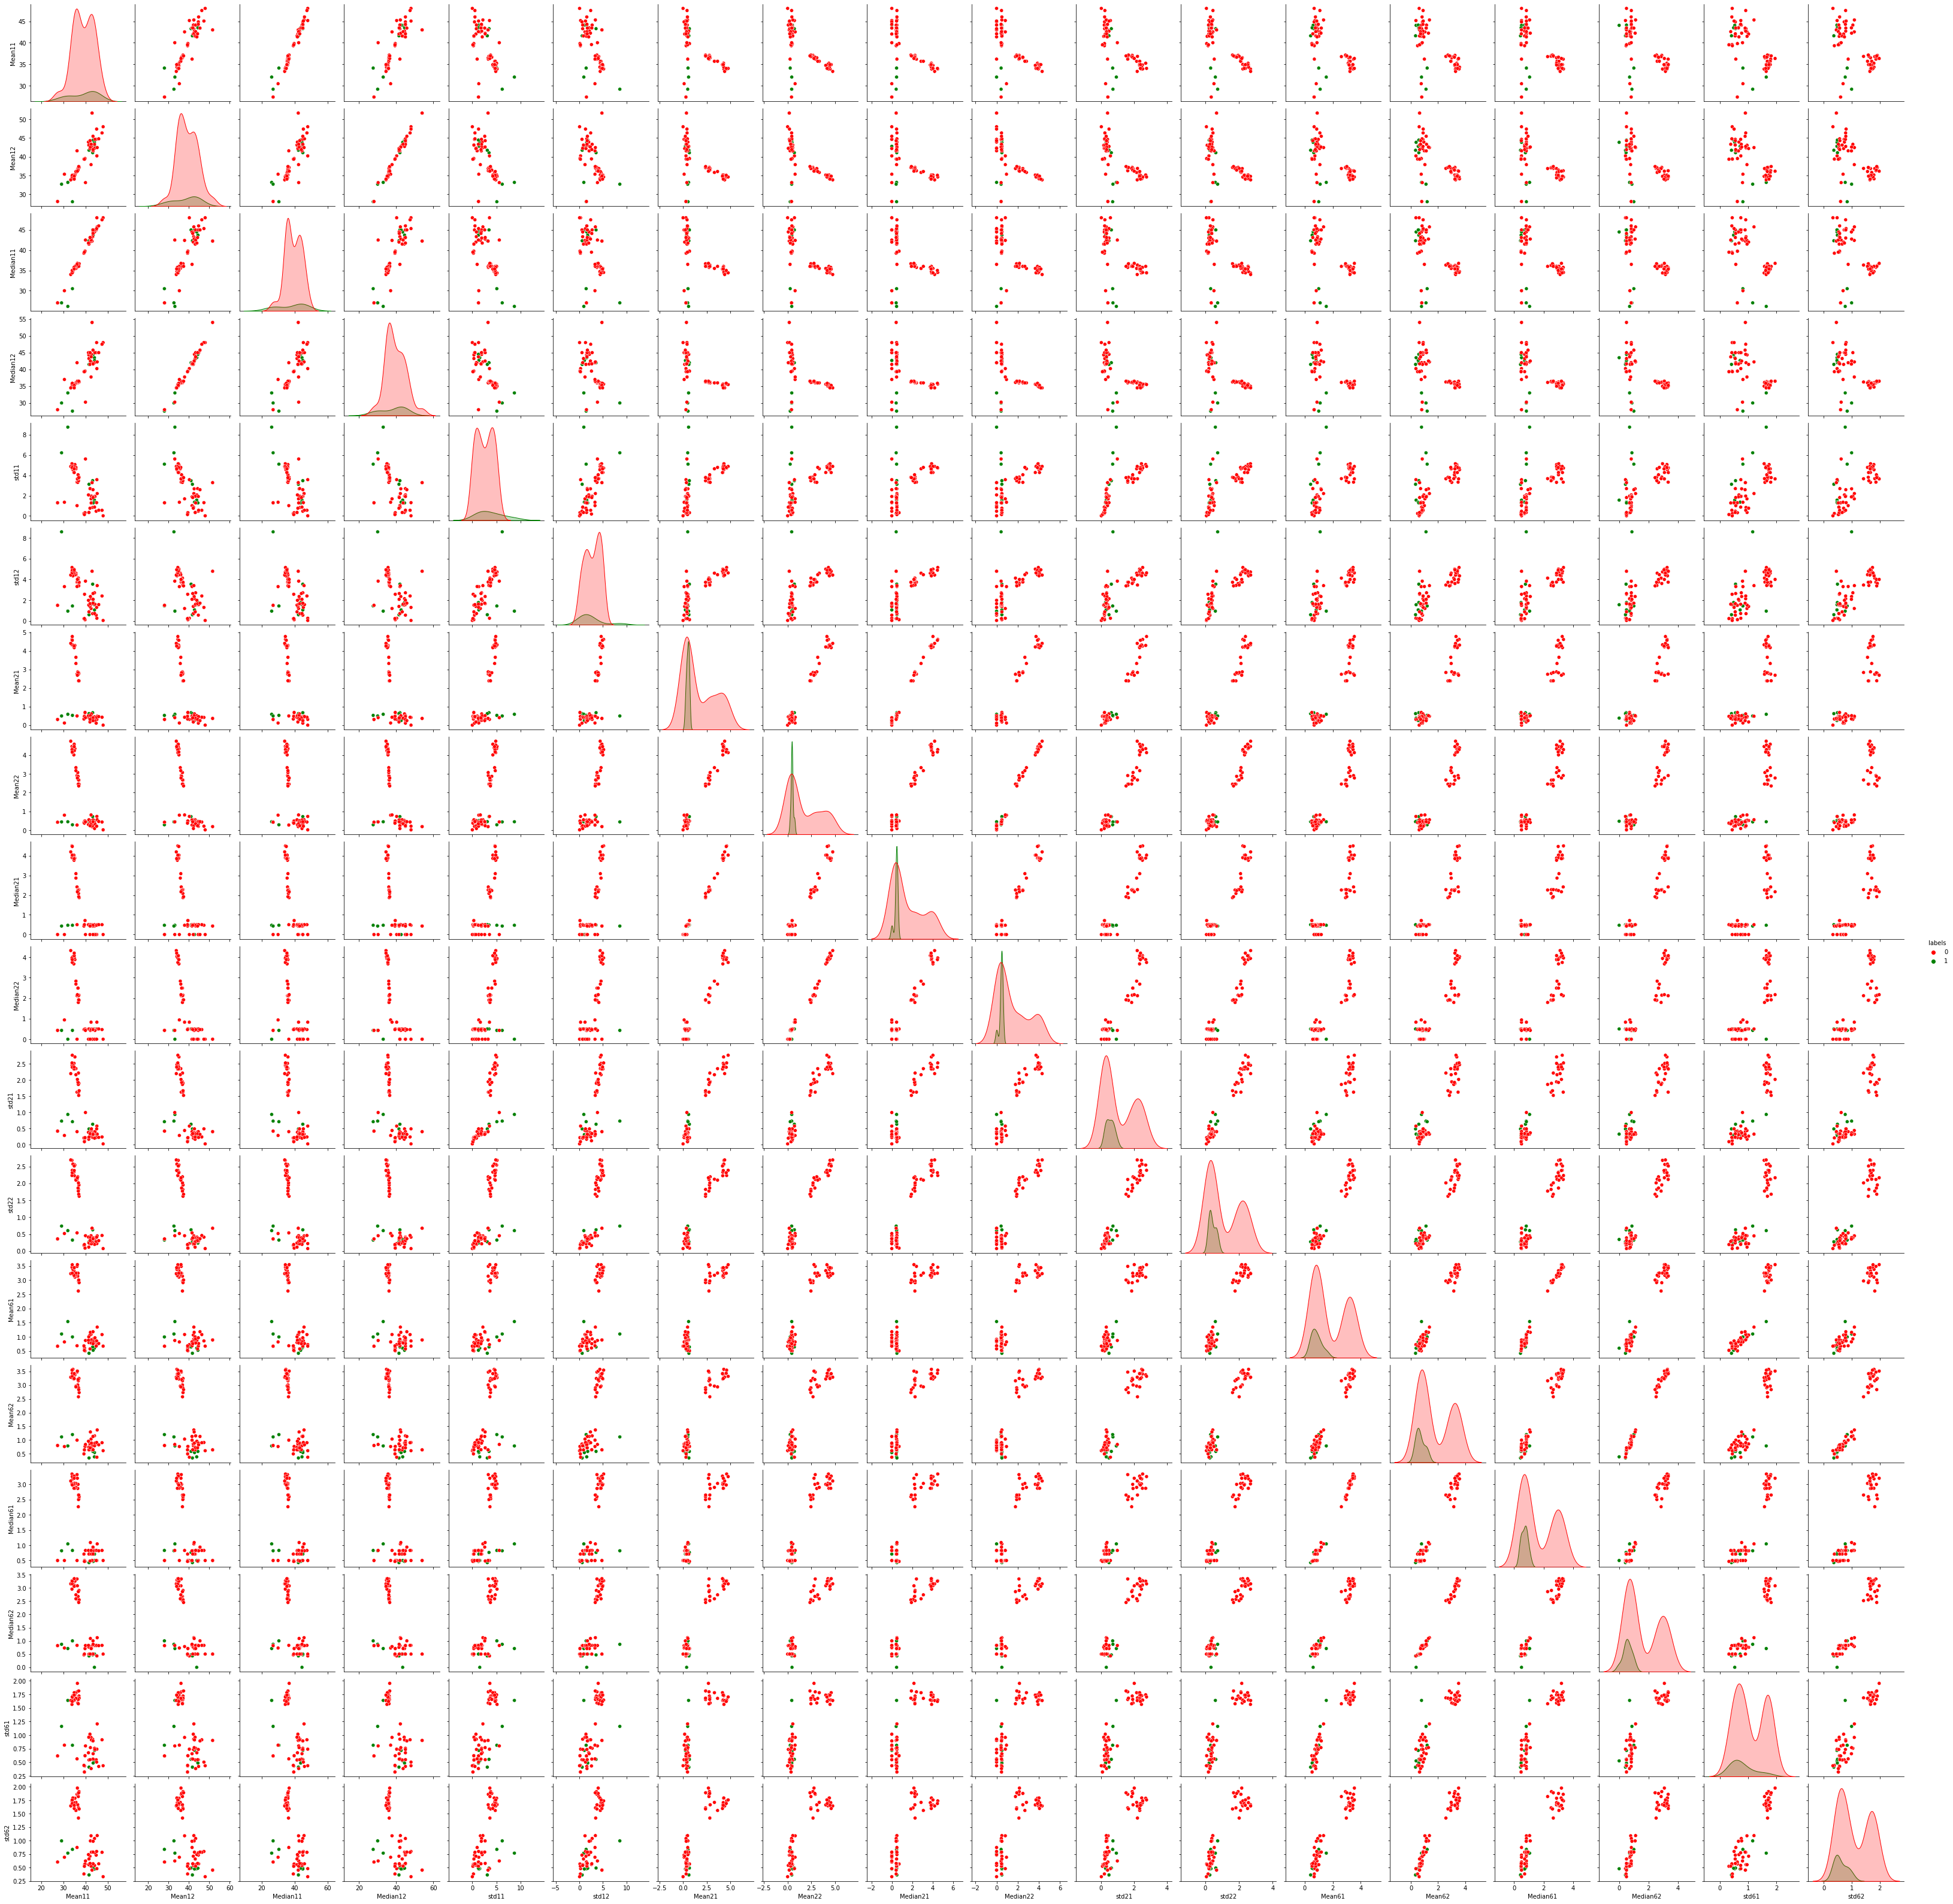

In [36]:
sns.pairplot(df_final,hue="labels",palette=['r','g'])

#### iii. Time Series Segments

In [37]:
def main_df2(p):
    fnl_col = []
    stat = ['Mean','Median','std']

    for i in range(1,7):
        for j in stat:
            for k in range(1,p+1):
                fnl_col.append(j+str(i)+str(k))
    
    df_fnl= pd.DataFrame(columns=fnl_col)
    l1=[]
    l2=[]
    l3=[]
    lst_fnl=[]
    for v in train_list:
        for j in range(1,7):
            d=np.array_split(v, p)
            for i in d:
                k=i.iloc[:,j]
                l1.append(k.mean())            
            for i in d:
                k=i.iloc[:,j]          
                l2.append(k.median())
            for i in d:
                k=i.iloc[:,j]          
                l3.append(k.std())
            lst_fnl.append(l1)
            l1=[]
            lst_fnl.append(l2)
            l2=[]
            lst_fnl.append(l3)
            l3=[]
        
    flat=[]
    for i in lst_fnl:
        flat+=i
    j=0
    for i in fnl_col:
        df_fnl[i] = flat[j:len(flat)+1:18*p]
        j+=1
    labelss= list([1]*9 + [0]*60)
    df_fnl['labels']=labelss
    return df_fnl
main_df2(2)

,Mean11,Mean12,Median11,Median12,std11,std12,Mean21,Mean22,Median21,Median22,...,Median52,std51,std52,Mean61,Mean62,Median61,Median62,std61,std62,labels
0,44.057167,43.851833,44.500,43.500,1.556971,1.557168,0.381042,0.471458,0.470,0.500,...,36.000,1.315724,2.298693,0.598250,0.388333,0.500,0.000,0.526656,0.478528,1
1,43.278875,41.080750,45.000,42.000,3.473355,3.537481,0.673292,0.718792,0.485,0.500,...,30.415,1.650105,3.760118,0.640958,0.586083,0.765,0.470,0.554542,0.491873,1
2,41.621208,41.734917,42.330,41.500,3.118644,0.595920,0.623083,0.448875,0.500,0.500,...,29.750,2.701406,2.062647,0.419083,0.347500,0.430,0.430,0.411200,0.363144,1
3,44.117042,42.792875,45.000,42.670,1.359836,1.058792,0.250042,0.506125,0.000,0.500,...,23.250,2.967487,1.881721,0.815417,0.543875,0.710,0.500,0.718016,0.473445,1
4,43.486208,44.452042,43.710,44.500,1.281976,1.771251,0.378667,0.447583,0.470,0.500,...,21.750,4.271610,1.929494,0.524875,0.585750,0.470,0.500,0.486847,0.487918,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,33.334500,33.839250,34.000,34.500,4.874433,4.411903,4.408083,4.745042,4.195,4.320,...,15.875,3.335954,3.232396,3.229167,3.290292,3.110,3.155,1.637310,1.646023,0
65,34.036750,34.608750,34.415,35.500,4.872880,4.621400,4.778292,4.134375,4.030,3.740,...,15.750,3.083111,3.162332,3.543708,3.321417,3.255,3.155,1.703098,1.758379,0
66,34.033875,35.058583,35.000,35.875,4.758757,4.880650,4.574625,4.169292,4.470,3.880,...,15.000,2.882518,2.660153,3.244042,3.432208,2.980,3.255,1.619767,1.691050,0
67,34.920792,34.825667,35.330,35.250,4.272282,4.785599,4.177958,4.583208,3.865,4.070,...,16.000,3.103469,3.163566,3.430625,3.418667,3.270,3.350,1.781928,1.598536,0


In [38]:
from sklearn.impute import SimpleImputer
import pandas as pd  

lst_mean = []
lst_features = []
p = [p for p in range(1, 21)]

for val in p:
    estimator = LogisticRegression()
    selector = RFECV(estimator, min_features_to_select=3, cv=StratifiedKFold(n_splits=5))
    z = main_df2(val)
    x = z.iloc[:, :-1]
    y = z['labels']
    imputer = SimpleImputer(strategy='mean')
    x = imputer.fit_transform(x)
    x = pd.DataFrame(x, columns=z.columns[:-1])

    selector.fit(x, y)
    lst_mean.append(np.mean(selector.cv_results_['mean_test_score']))
    mask = selector.support_
    lst_features.append(selector.get_feature_names_out(z.columns[:-1]))
    print(val, x.shape)

print(lst_mean)


1 (69, 18)
2 (69, 36)
3 (69, 54)
4 (69, 72)
5 (69, 90)
6 (69, 108)
7 (69, 126)
8 (69, 144)
9 (69, 162)
10 (69, 180)
11 (69, 198)
12 (69, 216)
13 (69, 234)
14 (69, 252)
15 (69, 270)
16 (69, 288)
17 (69, 306)
18 (69, 324)
19 (69, 342)
20 (69, 360)
[0.9167582417582418, 0.8866839043309632, 0.8859890109890108, 0.866938775510204, 0.8316558441558441, 0.7831536388140161, 0.7325062034739452, 0.6859619253985451, 0.6087156593406593, 0.5616557599703667, 0.5307692307692308, 0.5137516688918559, 0.4598948465327777, 0.45204395604395614, 0.452382319173364, 0.4422538999462076, 0.4296414112203586, 0.4374138284076172, 0.4239431157078216, 0.3928632819694272]


In [39]:
l=np.argmax(lst_mean)+1
feature_sub=lst_features[l-1]
p=len(feature_sub)
feature_sub
l

1

In [40]:
print("Best l,p pair:",l,p)

Best l,p pair: 1 3


In [41]:
lp_df=main_df2(l)
lp_df

,Mean11,Median11,std11,Mean21,Median21,std21,Mean31,Median31,std31,Mean41,Median41,std41,Mean51,Median51,std51,Mean61,Median61,std61,labels
0,43.954500,44.33,1.558835,0.426250,0.470,0.338690,22.122354,23.000,3.030943,0.497312,0.43,0.550657,35.588458,36.00,1.999604,0.493292,0.43,0.513506,1
1,42.179812,43.50,3.670666,0.696042,0.500,0.630860,22.183625,23.000,3.810469,0.989917,0.83,0.953730,33.493917,35.00,3.849448,0.613521,0.50,0.524317,1
2,41.678063,41.75,2.243490,0.535979,0.500,0.405469,19.006563,19.125,4.087107,0.841875,0.50,0.928801,29.857083,30.00,2.411026,0.383292,0.43,0.389164,1
3,43.454958,43.25,1.386098,0.378083,0.470,0.315566,15.793333,15.000,3.847638,0.849354,0.50,0.995761,23.034792,23.50,2.488862,0.679646,0.50,0.622534,1
4,43.969125,44.50,1.618364,0.413125,0.470,0.263111,15.868021,16.250,3.742420,0.666354,0.47,0.788985,22.103750,21.67,3.318301,0.555312,0.49,0.487826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,33.586875,34.25,4.650935,4.576562,4.260,2.461077,15.317854,15.330,2.970440,3.227229,3.10,1.647474,15.892146,16.00,3.283983,3.259729,3.11,1.640243,0
65,34.322750,35.25,4.752477,4.456333,3.900,2.599284,15.209771,15.250,2.711022,3.277229,3.11,1.500046,15.550458,15.75,3.119856,3.432563,3.20,1.732727,0
66,34.546229,35.25,4.842294,4.371958,4.135,2.360448,15.185729,15.250,2.757604,3.028687,2.86,1.665184,15.759542,15.75,2.823124,3.338125,3.08,1.656742,0
67,34.873229,35.25,4.531720,4.380583,3.925,2.435437,15.471188,15.500,2.813077,3.205688,3.03,1.519348,15.873896,16.00,3.131076,3.424646,3.27,1.690960,0


In [42]:
lp_df_fnl=lp_df[feature_sub]
label_lp= list([1]*9 + [0]*60)
lp_df_fnl['labels']=label_lp
lp_df_fnl

,Median41,Mean51,std51,labels
0,0.43,35.588458,1.999604,1
1,0.83,33.493917,3.849448,1
2,0.50,29.857083,2.411026,1
3,0.50,23.034792,2.488862,1
4,0.47,22.103750,3.318301,1
...,...,...,...,...
64,3.10,15.892146,3.283983,0
65,3.11,15.550458,3.119856,0
66,2.86,15.759542,2.823124,0
67,3.03,15.873896,3.131076,0


In [43]:
feature_sub

array(['Median41', 'Mean51', 'std51'], dtype=object)

##### The incorrect method of performing cross validation is to first pick the best features subset that shows pretty good association and then use that subset to build a classifier.Cross validation is done correctly by first splitting the data into k-folds and then determining the best features using all of the samples except the one that is missing. Then, using all of the samples, constructing a classifier and then testing it on the ones that were left out.

In [44]:
import statsmodels.api as sm

X_train = lp_df_fnl.iloc[:, :-1]
Y_train = lp_df_fnl.iloc[:, -1:]

missing_values = X_train.isna().sum().sum()
if missing_values > 0:
    X_train.fillna(0, inplace=True) 

infinite_values = np.isinf(X_train).sum().sum()
if infinite_values > 0:
    X_train.replace([np.inf, -np.inf], 0, inplace=True) 

log_reg = sm.Logit(Y_train, X_train).fit(method="lbfgs")
print(log_reg.summary())


                           Logit Regression Results                           
Dep. Variable:                 labels   No. Observations:                   69
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.5041
Time:                        20:00:45   Log-Likelihood:                -13.249
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.415e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Median41     -21.0042      7.777     -2.701      0.007     -36.246      -5.762
Mean51         0.5257      0.193      2.726      0.006       0.148       0.904
std51         -0.0577      0.356     -0.162      0.8

#### iv. Confusion Matrix

[[60  0]
 [ 5  4]]


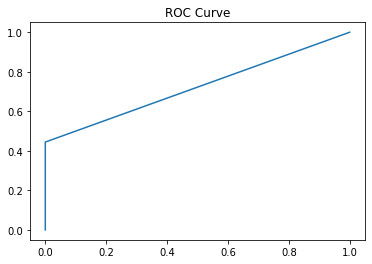

AUC: 0.7222222222222222


In [45]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

pred=logisticRegr.predict(X_train)

print(confusion_matrix(Y_train,pred))
fpr,tpr,thresholds=metrics.roc_curve(Y_train, pred)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()
print('AUC:',metrics.auc(fpr,tpr))

#### v. Test Classifier

In [46]:
def main_test2(p):
    fnl_col_test = []
    stat = ['Mean','Median','std']

    for i in range(1,7):
        for j in stat:
            for k in range(1,p+1):
                fnl_col_test.append(j+str(i)+str(k))
    
    df_fnl_test= pd.DataFrame(columns=fnl_col_test)
    l1=[]
    l2=[]
    l3=[]
    lst_fnl_test=[]
    for v in test_list:
        for j in range(1,7):
            d=np.array_split(v, p)
            for i in d:
                k=i.iloc[:,j]
                l1.append(k.mean())            
            for i in d:
                k=i.iloc[:,j]          
                l2.append(k.median())
            for i in d:
                k=i.iloc[:,j]          
                l3.append(k.std())
            lst_fnl_test.append(l1)
            l1=[]
            lst_fnl_test.append(l2)
            l2=[]
            lst_fnl_test.append(l3)
            l3=[]
        
    flat=[]
    for i in lst_fnl_test:
        flat+=i
    j=0
    for i in fnl_col_test:
        df_fnl_test[i] = flat[j:len(flat)+1:18*p]
        j+=1
    labelss= list([1]*4 + [0]*15)
    df_fnl_test['labels']=labelss
    return df_fnl_test


In [47]:
tst= main_test2(l)
tst

,Mean11,Median11,std11,Mean21,Median21,std21,Mean31,Median31,std31,Mean41,Median41,std41,Mean51,Median51,std51,Mean61,Median61,std61,labels
0,40.624792,40.500,1.476967,0.358604,0.430,0.322605,19.040937,19.250,4.462952,0.832542,0.500,0.965659,34.311292,35.000,2.188449,0.570583,0.430,0.582915,1
1,42.812812,42.500,1.435550,0.372437,0.470,0.289158,20.096979,21.000,3.893737,0.876438,0.500,1.047259,33.024583,33.000,1.995255,0.571083,0.430,0.601010,1
2,24.562958,24.250,3.737514,0.590833,0.430,0.837408,19.121333,20.250,4.299612,0.736771,0.470,0.927048,23.493042,23.750,3.693786,0.700188,0.500,0.693720,1
3,27.464604,28.000,3.583582,0.449708,0.430,0.767197,20.842542,20.750,3.826268,0.779917,0.500,0.904436,17.617938,18.000,5.053642,1.122125,0.830,1.012342,1
4,37.177042,36.250,3.581301,2.374208,1.920,1.601799,16.531083,16.670,3.430906,2.910604,2.620,1.600137,19.607250,20.000,2.890347,2.921729,2.500,1.852600,0
5,37.561187,36.875,3.226507,2.080687,1.700,1.639258,16.567042,17.000,3.691401,3.033875,2.950,1.625415,19.518896,20.000,2.727377,2.765896,2.450,1.769203,0
6,37.058708,36.000,3.710180,2.438146,1.920,1.996887,16.388313,16.500,3.537950,2.980688,2.860,1.612059,18.125958,18.875,3.537144,2.983750,2.570,1.815730,0
7,27.716375,27.500,1.442253,0.363687,0.430,0.394817,6.078563,6.250,3.468994,0.871021,0.820,0.777400,8.337437,8.750,4.074511,0.734271,0.710,0.613688,0
8,44.182937,48.000,7.495615,0.101875,0.000,0.346756,6.679958,6.250,1.936492,0.584104,0.430,0.749945,4.376292,3.330,3.274539,0.692771,0.500,0.675781,0
9,48.004167,48.000,0.032038,0.007167,0.000,0.055106,4.900563,5.500,2.566429,0.397312,0.430,0.447127,7.624896,9.000,3.268502,0.641229,0.500,0.388372,0


In [48]:
lp_df_test=tst[feature_sub]
label_lp_test= list([1]*4 + [0]*15)
lp_df_test['labels']=label_lp_test
lp_df_test

,Median41,Mean51,std51,labels
0,0.500,34.311292,2.188449,1
1,0.500,33.024583,1.995255,1
2,0.470,23.493042,3.693786,1
3,0.500,17.617938,5.053642,1
4,2.620,19.607250,2.890347,0
5,2.950,19.518896,2.727377,0
6,2.860,18.125958,3.537144,0
7,0.820,8.337437,4.074511,0
8,0.430,4.376292,3.274539,0
9,0.430,7.624896,3.268502,0


In [49]:
import statsmodels.api as sms
X_train_tst=lp_df_test.iloc[:,:-1]
Y_train_tst=lp_df_test.iloc[:,-1:]
log_reg_tst = sms.Logit(Y_train_tst, X_train_tst).fit(method="lbfgs")
print(log_reg_tst.summary())

                           Logit Regression Results                           
Dep. Variable:                 labels   No. Observations:                   19
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.8208
Time:                        20:02:53   Log-Likelihood:                -1.7526
converged:                       True   LL-Null:                       -9.7784
Covariance Type:            nonrobust   LLR p-value:                 0.0003269
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Median41    -141.8179    199.312     -0.712      0.477    -532.463     248.827
Mean51         2.0040      2.452      0.817      0.414      -2.803       6.811
std51          6.9920     11.837      0.591      0.5

[[15  0]
 [ 1  3]]


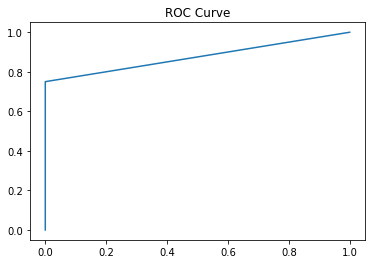

AUC: 0.875


In [50]:
from sklearn import metrics
logisticRegr_tst = LogisticRegression()
logisticRegr_tst.fit(X_train_tst, Y_train_tst)

pred_tst=logisticRegr_tst.predict(X_train_tst)

print(confusion_matrix(Y_train_tst,pred_tst))
fpr,tpr,thresholds=metrics.roc_curve(Y_train_tst, pred_tst)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()
print('AUC:',metrics.auc(fpr,tpr))

In [51]:
acc= metrics.accuracy_score(Y_train_tst,pred_tst)
acc

0.9473684210526315

#### vi. Separation

Yes, Yes there is complete separation between the variables. Also the p values for each variable is high and the summary shows that the maximal likelihood cannot be computed for this model and that there is a complete seperation between classes.

From the pairplot and scatterplot, the classes seem to be well-separated.

#### vii. Imbalance

Yes, based on the confusion matrices, imbalanced classes were observed. For case-control sampling, SMOTE() is used.

In [53]:
pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 235.6/235.6 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_train_sm, Y_train_sm = smo.fit_resample(X_train,Y_train)
Y_train_sm.value_counts()

log_reg_sm = sms.Logit(Y_train_sm, X_train_sm).fit(method='lbfgs')
lr_pred_sm=log_reg_sm.predict(X_train_sm)
print(log_reg_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                 labels   No. Observations:                  120
Model:                          Logit   Df Residuals:                      117
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.7215
Time:                        20:07:08   Log-Likelihood:                -23.167
converged:                       True   LL-Null:                       -83.178
Covariance Type:            nonrobust   LLR p-value:                 8.662e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Median41     -34.6545      8.318     -4.166      0.000     -50.957     -18.352
Mean51         0.8020      0.180      4.451      0.000       0.449       1.155
std51          0.6759      0.266      2.545      0.0

[[55  5]
 [ 2 58]]


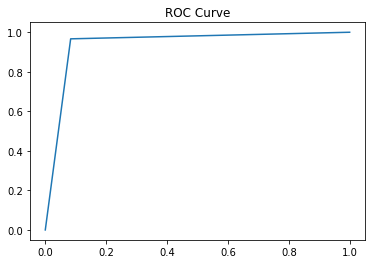

AUC: 0.9416666666666667


In [55]:
logisticRegr_sm = LogisticRegression()
logisticRegr_sm.fit(X_train_sm, Y_train_sm)

pred_sm=logisticRegr_sm.predict(X_train_sm)

print(confusion_matrix(Y_train_sm,pred_sm))
fpr,tpr,thresholds=metrics.roc_curve(Y_train_sm, pred_sm)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()
print('AUC:',metrics.auc(fpr,tpr))

#### Question 2.b(i)
Binary Classification Using L1-penalized logistic regression.

i. Repeat 2(a)iii using L1-penalized logistic regression,8 i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and , the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for  automatically.9

In [57]:
scores_lst_l1 = []
lval_l1 = []
cval_lt = []

for i in range(1, 21):
    h = main_df2(i)
    x1 = h.iloc[:, :-1]
    if x1.isna().sum().sum() > 0:
        x1.fillna(0, inplace=True)  
    
    x = StandardScaler().fit_transform(x1)
    y = h['labels']

    g = main_test2(i)
    g1 = g.iloc[:, :-1]

    if g1.isna().sum().sum() > 0:
        g1.fillna(0, inplace=True) 
    
    x2 = StandardScaler().fit_transform(g1)
    y2 = g['labels']

    log_reg_l1 = LogisticRegressionCV(Cs=10, random_state=0, penalty='l1', cv=5, solver='liblinear', refit=True)
    log_reg_l1 = log_reg_l1.fit(x, y)

    Y_pred_l1 = log_reg_l1.predict(x)
    Y_pred_test = log_reg_l1.predict(x2)

    scores_lst_l1.append(log_reg_l1.score(x, y))
    cval_lt.append(log_reg_l1.C_)
    lval_l1.append((i, log_reg_l1.C_))

    for i in range(len(scores_lst_l1)):
        if scores_lst_l1[i] == 1.0:
            scores_lst_l1[i] = 0


In [58]:
max_c1=max(scores_lst_l1)
split_index=scores_lst_l1.index(max_c1)+1
split_index
best_C=cval_lt[split_index-1]
print(f"The best value for l is {split_index} and the value of {best_C} ")

The best value for l is 1 and the value of [2.7825594] 


#### ii. Comparison

On the basis of above results, L1-penalized performs better than Variable selection using p-values.

L1-penalized is easier to implement.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [59]:
act_labels = ['bending1']*5+['bending2']*4+['cycling']*12+['lying']*12+['sitting']*12+['standing']*12+['walking']*12
def multinomial(p):
    fnl_col_mul = []
    stat = ['Mean','Median','std']

    for i in range(1,7):
        for j in stat:
            for k in range(1,p+1):
                fnl_col_mul.append(j+str(i)+str(k))
    
    df_fnl_mul= pd.DataFrame(columns=fnl_col_mul)
    l1=[]
    l2=[]
    l3=[]
    lst_fnl_mul=[]
    for v in train_list:
        for j in range(1,7):
            d=np.array_split(v, p)
            for i in d:
                k=i.iloc[:,j]
                l1.append(k.mean())            
            for i in d:
                k=i.iloc[:,j]          
                l2.append(k.median())
            for i in d:
                k=i.iloc[:,j]          
                l3.append(k.std())
            lst_fnl_mul.append(l1)
            l1=[]
            lst_fnl_mul.append(l2)
            l2=[]
            lst_fnl_mul.append(l3)
            l3=[]
        
    flat=[]
    for i in lst_fnl_mul:
        flat+=i
    j=0
    for i in fnl_col_mul:
        df_fnl_mul[i] = flat[j:len(flat)+1:18*p]
        j+=1
    
    df_fnl_mul['label_activity']=act_labels
    return df_fnl_mul

In [60]:
act_tst_labels=['bending1']*2+['bending2']*2+['cycling']*3+['lying']*3+['sitting']*3+['standing']*3+['walking']*3
def multi_test(p):
    fnl_col_test = []
    stat = ['Mean','Median','std']

    for i in range(1,7):
        for j in stat:
            for k in range(1,p+1):
                fnl_col_test.append(j+str(i)+str(k))
    
    df_fnl_test= pd.DataFrame(columns=fnl_col_test)
    l1=[]
    l2=[]
    l3=[]
    lst_fnl_test=[]
    for v in test_list:
        for j in range(1,7):
            d=np.array_split(v, p)
            for i in d:
                k=i.iloc[:,j]
                l1.append(k.mean())            
            for i in d:
                k=i.iloc[:,j]          
                l2.append(k.median())
            for i in d:
                k=i.iloc[:,j]          
                l3.append(k.std())
            lst_fnl_test.append(l1)
            l1=[]
            lst_fnl_test.append(l2)
            l2=[]
            lst_fnl_test.append(l3)
            l3=[]
        
    flat=[]
    for i in lst_fnl_test:
        flat+=i
    j=0
    for i in fnl_col_test:
        df_fnl_test[i] = flat[j:len(flat)+1:18*p]
        j+=1
    
    df_fnl_test['label_activity_tst']=act_tst_labels
    return df_fnl_test


In [63]:
model_lst = []

for i in range(1, 21):
    model = LogisticRegressionCV(Cs=10, random_state=0, penalty='l1', cv=5, solver='liblinear', refit=True)
    mul = multinomial(i)
    x = mul.iloc[:, :-1]
    y = mul['label_activity']

    if x.isna().sum().sum() > 0:
        x.fillna(0, inplace=True)
    
    mul_log_reg = model.fit(x, y)
    model_lst.append(mul_log_reg.score(x, y))


In [64]:
for i in range(len(model_lst)):
        if model_lst[i]==1.0:
            model_lst[i]=0 


In [65]:
best_l=np.argmax(model_lst)+1
print(f"The best l value is {best_l}")

The best l value is 1


#### ii. Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model_lst_nb = []

for i in range(1, 21):
    model_nb = MultinomialNB()
    mul_nb = multinomial(i)
    imputer = SimpleImputer(strategy="mean")
    x = imputer.fit_transform(mul_nb.iloc[:, :-1])
    y = mul_nb['label_activity']
    
    mul_log_reg_nb = model_nb.fit(x, y)
       
    model_lst_nb.append(accuracy_score(y, mul_log_reg_nb.predict(x)))


In [79]:
best_l_NB= np.argmax(model_lst_nb)+1
print("The Best l value is:",best_l_NB)

The Best l value is: 5


In [80]:
print("The accuracy is:",model_lst_nb[best_l_NB])

The accuracy is: 0.9565217391304348


In [85]:
model_nb = MultinomialNB()
mul_nb = multinomial(best_l_NB)
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(mul_nb.iloc[:, :-1])
y = mul_nb['label_activity']
mul_tst_nb = multi_test(best_l_NB)
xtst_nb = mul_tst_nb.iloc[:, :-1]
ytst_nb = mul_tst_nb['label_activity_tst']
xtst_nb = imputer.transform(xtst_nb)
mul_log_reg_nb = model_nb.fit(x, y)

ypred_nb = mul_log_reg_nb.predict(xtst_nb)
accuracy = accuracy_score(ytst_nb, ypred_nb)
confusion = confusion_matrix(ytst_nb, ypred_nb)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.8421052631578947
Confusion Matrix:
 [[2 0 0 0 0 0 0]
 [1 1 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


In [86]:
from sklearn.naive_bayes import GaussianNB

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

model_gaus_lst = []

for i in range(1, 21):
    model_gaus = GaussianNB()
    mul_gaus = multinomial(i)
    x = mul_gaus.iloc[:, :-1]
    y = mul_gaus['label_activity']
    imputer = SimpleImputer(strategy='mean')
    x = imputer.fit_transform(x)

    mul_log_gaus = model_gaus.fit(x, y)
    model_gaus_lst.append(mul_log_gaus.score(x, y))

for i in range(len(model_gaus_lst)):
    if model_gaus_lst[i] == 1.0:
        model_gaus_lst[i] = 0

In [89]:
best_l_gauss= np.argmax(model_gaus_lst)+1
print("The Best l value is:",best_l_gauss)

The Best l value is: 3


In [90]:
print("The accuracy is:",model_gaus_lst[best_l_gauss])

The accuracy is: 0.9855072463768116


In [93]:

gaus_gb = GaussianNB()
gaus_nbb = multinomial(best_l_gauss)
xgb = gaus_nbb.iloc[:, :-1]
ygb = gaus_nbb['label_activity']

mul_tst_gb = multi_test(best_l_gauss)
xtst_gb = mul_tst_gb.iloc[:, :-1]
ytst_gb = mul_tst_gb['label_activity_tst']
imputer = SimpleImputer(strategy='mean')
xgb = imputer.fit_transform(xgb)
xtst_gb = imputer.transform(xtst_gb)

mul_log_reg_gaus = gaus_gb.fit(xgb, ygb)
ypred_gb = mul_log_reg_gaus.predict(xtst_gb)
accuracy_gb = accuracy_score(ytst_gb, ypred_gb)
confusion_gb = confusion_matrix(ytst_gb, ypred_gb)

print("Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", confusion_gb)


Accuracy: 0.8421052631578947
Confusion Matrix:
 [[1 0 0 0 1 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


#### ii. Comparison

## 3. ISLR 4.8.3

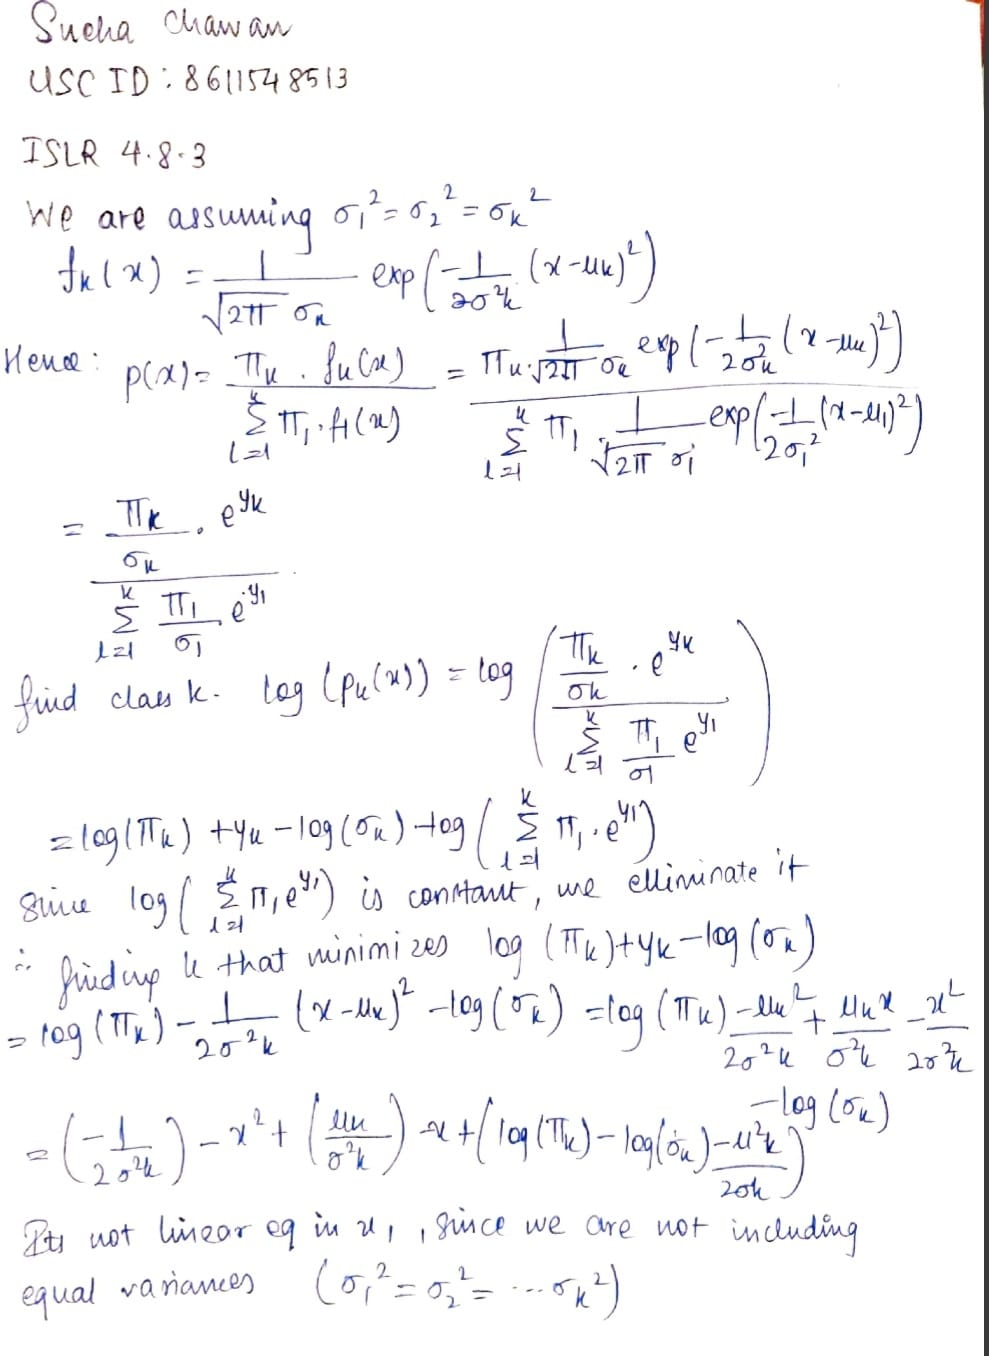

## 4. ISLR 4.8.7

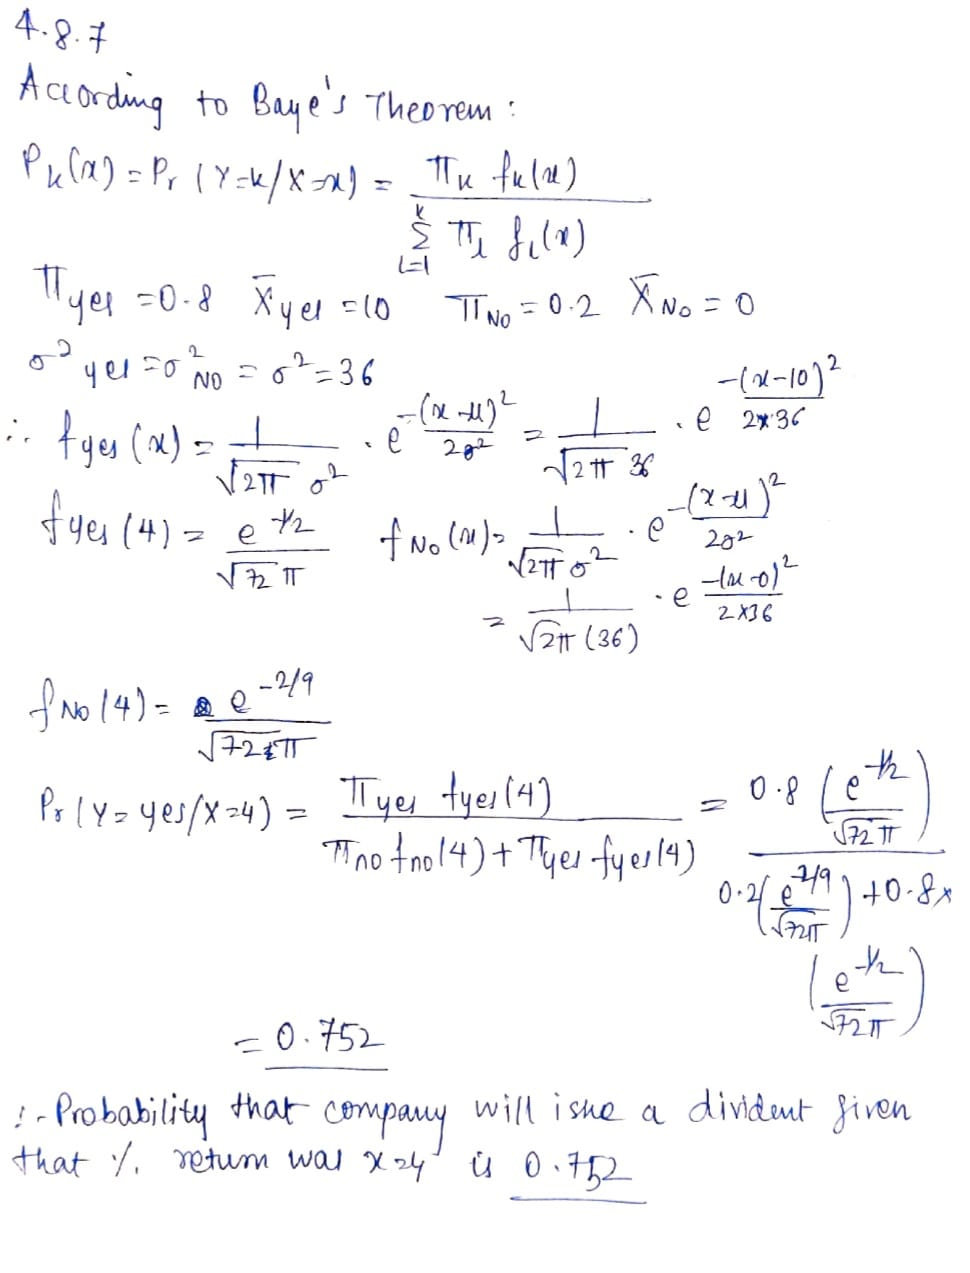